In [17]:
import pandas as pd
import tiktoken
import numpy as np

df = pd.read_csv('/content/sample_data/financial_narration_data.csv')

enc = tiktoken.get_encoding('cl100k_base')

In [18]:
# enc input
prompt_lengths = []
for prompt in df['prompt']:
  tokens = enc.encode(prompt)
  prompt_lengths.append(len(tokens))

#decoder target inc eos token
target_lengths = []
for target_str in df['target']:
  tokens = enc.encode(target_str)
  target_lengths.append(len(tokens) + 1)


In [19]:
prompt_lengths_np = np.array(prompt_lengths)
target_lengths_np = np.array(target_lengths)

print("~~~~~# Prompt length analysis (Encoder input) ~~~~~#")
print(f"Min length : {np.min(prompt_lengths_np)}")
print(f"Max length : {np.max(prompt_lengths_np)}")
print(f"Avg length: {np.mean(prompt_lengths_np):.2f}")
print(f"90th percentile: {np.percentile(prompt_lengths_np, 90)}")
print(f"95th percentile: {np.percentile(prompt_lengths_np, 95)}")
print(f"99th percentile: {np.percentile(prompt_lengths_np, 99)}")


print("~~~~~# Target length analysis (decoder output + EOS) ~~~~~#")
print(f"Min length : {np.min(target_lengths_np)}")
print(f"Max length : {np.max(target_lengths_np)}")
print(f"Avg length: {np.mean(target_lengths_np):.2f}")
print(f"90th percentile: {np.percentile(target_lengths_np, 90)}")
print(f"95th percentile: {np.percentile(target_lengths_np, 95)}")
print(f"99th percentile: {np.percentile(target_lengths_np, 99)}")

~~~~~# Prompt length analysis (Encoder input) ~~~~~#
Min length : 22
Max length : 25
Avg length: 23.49
90th percentile: 24.0
95th percentile: 25.0
99th percentile: 25.0
~~~~~# Target length analysis (decoder output + EOS) ~~~~~#
Min length : 12
Max length : 19
Avg length: 15.62
90th percentile: 18.0
95th percentile: 18.0
99th percentile: 19.0


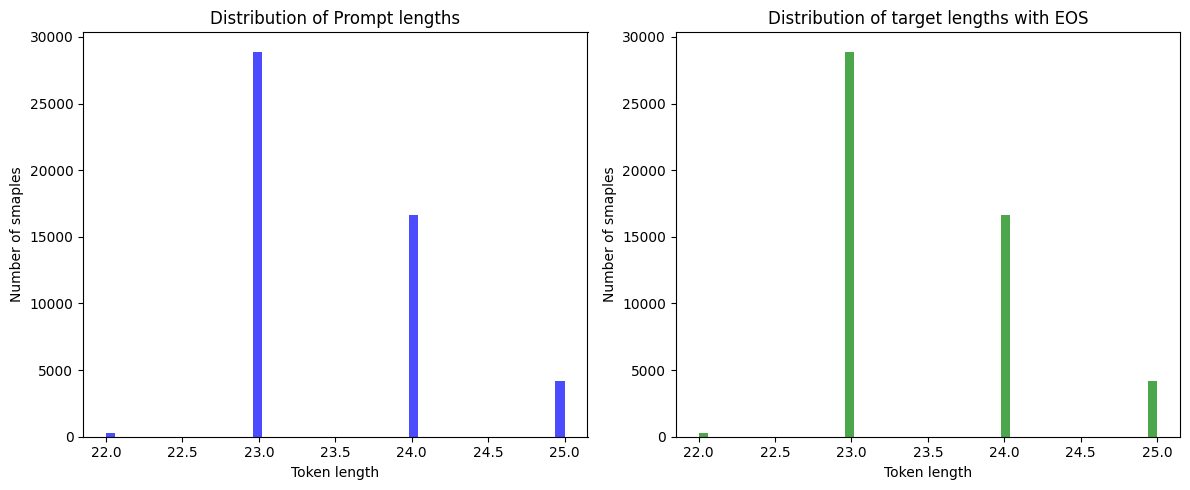

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(prompt_lengths_np, bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Prompt lengths')
plt.xlabel('Token length')
plt.ylabel('Number of smaples')

plt.subplot(1, 2, 2)
plt.hist(prompt_lengths_np, bins=50, alpha=0.7, color='green')
plt.title('Distribution of target lengths with EOS')
plt.xlabel('Token length')
plt.ylabel('Number of smaples')

plt.tight_layout()
plt.show()
